> Cifar10 데이터 셋으로 신경망 모델 구현
* 실제 이미지를 이용하여 예측 수행

In [0]:
from keras.datasets import cifar10
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# lable names
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [0]:
X_train_n = X_train.copy()
y_train_n = y_train.copy()

In [0]:
print('label = {}'.format(y_train[0:15,0]))

label = [6 9 9 4 1 1 2 7 8 3 4 7 7 2 9]


In [0]:
print('label = {}'.format(label_names[y_train[0,0]]))

label = frog


label = [6 9 9 4 1 1 2 7 8 3 4 7 7 2 9]


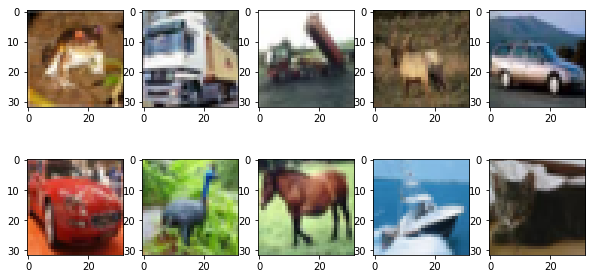

In [0]:
# label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print('label = {}'.format(y_train[0:15,0]))


fix, ax = plt.subplots(2,5,figsize=(10,5))

for i in range(5):
  ax[0][i].imshow(np.reshape(X_train[i], (32,32,3)))
  ax[1][i].imshow(np.reshape(X_train[i+5], (32,32,3)))

plt.show()

In [0]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
print(y_train.shape)

(50000, 10)


In [0]:
X = tf.placeholder(tf.float32, [None, 32, 32, 3])
Y = tf.placeholder(tf.float32, [None, 10])

In [0]:
W1 = tf.Variable(tf.random_normal([3,3,3,32], stddev=0.01))
L1 = tf.nn.conv2d(X, W1, strides=[1,1,1,1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
print(L1)

Tensor("MaxPool_20:0", shape=(?, 16, 16, 32), dtype=float32)


In [0]:
## 2번째 신경망 CONV 3*3 개수 64, 활성화 함수 relu, max_pool 2*2 strides 2
## 3번째 신경망 CONV 3*3 개수 128, 활성화 함수 relu, max_pool 2*2 strides 2

In [0]:
W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
print(L2)

Tensor("MaxPool_21:0", shape=(?, 8, 8, 64), dtype=float32)


In [0]:
W3 = tf.Variable(tf.random_normal([3,3,64,128], stddev=0.01))
L3 = tf.nn.conv2d(L2, W3, strides=[1,1,1,1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
print(L3)

Tensor("MaxPool_22:0", shape=(?, 4, 4, 128), dtype=float32)


In [0]:
W4 = tf.Variable(tf.random_normal([4*4*128, 256], stddev=0.01))
L4 = tf.reshape(L3, [-1,4*4*128])
L4 = tf.matmul(L4, W4)
L4 = tf.nn.relu(L4) 
print(L4)

Tensor("Relu_27:0", shape=(?, 256), dtype=float32)


In [0]:
W5 = tf.Variable(tf.random_normal([256,10], stddev=0.01))
model=tf.matmul(L4, W5)
model

<tf.Tensor 'MatMul_11:0' shape=(?, 10) dtype=float32>

In [0]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [0]:
batch_size = 100
total_batch = int(len(X_train)/batch_size)
print(total_batch)
epochs = 20

500


In [0]:
def next_batch(start, num, data, labels):
  data_X = data[start:start+num]
  data_y = labels[start:start+num]

  return np.asarray(data_X), np.asarray(data_y)

In [0]:
print(X_train.shape, y_train.shape)
batch_x, batch_y = next_batch(0, 10, X_train, y_train)
print(batch_x.shape, batch_y.shape)

(50000, 32, 32, 3) (50000, 10)
(10, 32, 32, 3) (10, 10)


In [0]:
total_cost = 0
epoch = 0
print('전체 입력 데이터 : {}'.format(X_train.shape))
print('전체 출력 데이터 : {}\n'.format(y_train.shape))

for epoch in range(51):
  total_cost = 0

  for i in range(total_batch):
    batch_xs, batch_ys = next_batch(batch_size*i, batch_size, X_train, y_train)

    _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})
    total_cost += cost_val

    if (i==0 or i==total_batch-1):
      print('data_step = {}, Avg. cost = {:.3f}'.format(i, cost_val))
  
  print('epoch: {} total.cost = {:.3f}'.format(epoch+1, total_cost))
  print('-------------------------------------------------------')

전체 입력 데이터 : (50000, 32, 32, 3)
전체 출력 데이터 : (50000, 10)

data_step = 0, Avg. cost = 2.301
data_step = 499, Avg. cost = 1.348
epoch: 1 total.cost = 817.894
-------------------------------------------------------
data_step = 0, Avg. cost = 1.121
data_step = 499, Avg. cost = 1.217
epoch: 2 total.cost = 572.793
-------------------------------------------------------
data_step = 0, Avg. cost = 0.877
data_step = 499, Avg. cost = 1.064
epoch: 3 total.cost = 480.741
-------------------------------------------------------
data_step = 0, Avg. cost = 0.741
data_step = 499, Avg. cost = 0.895
epoch: 4 total.cost = 420.155
-------------------------------------------------------
data_step = 0, Avg. cost = 0.627
data_step = 499, Avg. cost = 0.750
epoch: 5 total.cost = 367.486
-------------------------------------------------------
data_step = 0, Avg. cost = 0.652
data_step = 499, Avg. cost = 0.732
epoch: 6 total.cost = 338.893
-------------------------------------------------------
data_step = 0, Avg. 

In [0]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

print('train 정확도 : ', sess.run(accuracy, feed_dict = {X:X_train, Y:y_train}))
print('test 정확도 : ', sess.run(accuracy, feed_dict = {X:X_test, Y:y_test}))

train 정확도 :  0.94206
test 정확도 :  0.661


## 실제 검색 이미지를 이용한 예측

In [0]:
# label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
import cv2

In [0]:
img = cv2.imread('dog2.jpg')
print(img.shape)

(194, 259, 3)


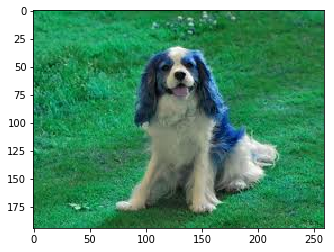

In [0]:
plt.imshow(img)

In [0]:
image_w = 32
image_h = 32

img = cv2.resize(img, None, fx=image_w/img.shape[1], fy=image_h/img.shape[0])
img.shape

(32, 32, 3)

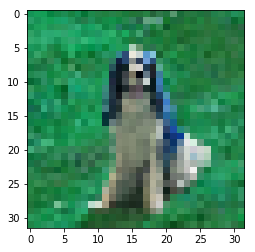

In [0]:
plt.imshow(img)

In [0]:
# print(img.shape)
# print(img.reshape(-1,32,32,3).shape)

(32, 32, 3)
(1, 32, 32, 3)


In [0]:
result = tf.argmax(model, 1)
idx = sess.run(result, feed_dict={X:img.reshape(-1,32,32,3)})
print('예측 레이블 : ', label_names[idx[0]])

예측 레이블 :  dog
